# Assignment 4 - K-Means Clustering
- Course: 64060 - Machine Learning and Data Analytics
- Datasource - Pharmaceuticals.csv

In [22]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("All libraries imported successfully!")

All libraries imported successfully!


In [23]:
from google.colab import files

# Upload the CSV file
print("Please upload your Pharmaceuticals.csv file:")
uploaded = files.upload()

# Load the data
df = pd.read_csv('Pharmaceuticals.csv')
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Please upload your Pharmaceuticals.csv file:


Saving Pharmaceuticals.csv to Pharmaceuticals (3).csv
Data loaded successfully!
Dataset shape: (21, 14)


In [24]:
numerical_vars = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA',
                  'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']

# Extract data for clustering
clustering_data = df[numerical_vars].copy()

# Variables not used in clustering
categorical_vars = ['Median_Recommendation', 'Location', 'Exchange']

print("Variables used for clustering:")
print(numerical_vars)
print("\nShape of clustering data:", clustering_data.shape)
print("\nStatistical summary of clustering variables:")
print(clustering_data.describe())

Variables used for clustering:
['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']

Shape of clustering data: (21, 9)

Statistical summary of clustering variables:
       Market_Cap       Beta   PE_Ratio        ROE        ROA  Asset_Turnover  \
count   21.000000  21.000000  21.000000  21.000000  21.000000       21.000000   
mean    57.651429   0.525714  25.461905  25.795238  10.514286        0.700000   
std     58.602960   0.256741  16.310257  15.084975   5.321399        0.216795   
min      0.410000   0.180000   3.600000   3.900000   1.400000        0.300000   
25%      6.300000   0.350000  18.900000  14.900000   5.700000        0.600000   
50%     48.190000   0.460000  21.500000  22.600000  11.200000        0.600000   
75%     73.840000   0.650000  27.900000  31.000000  15.000000        0.900000   
max    199.470000   1.110000  82.500000  62.900000  20.300000        1.100000   

        Leverage  Rev_Growth  Net_Profit_Mar

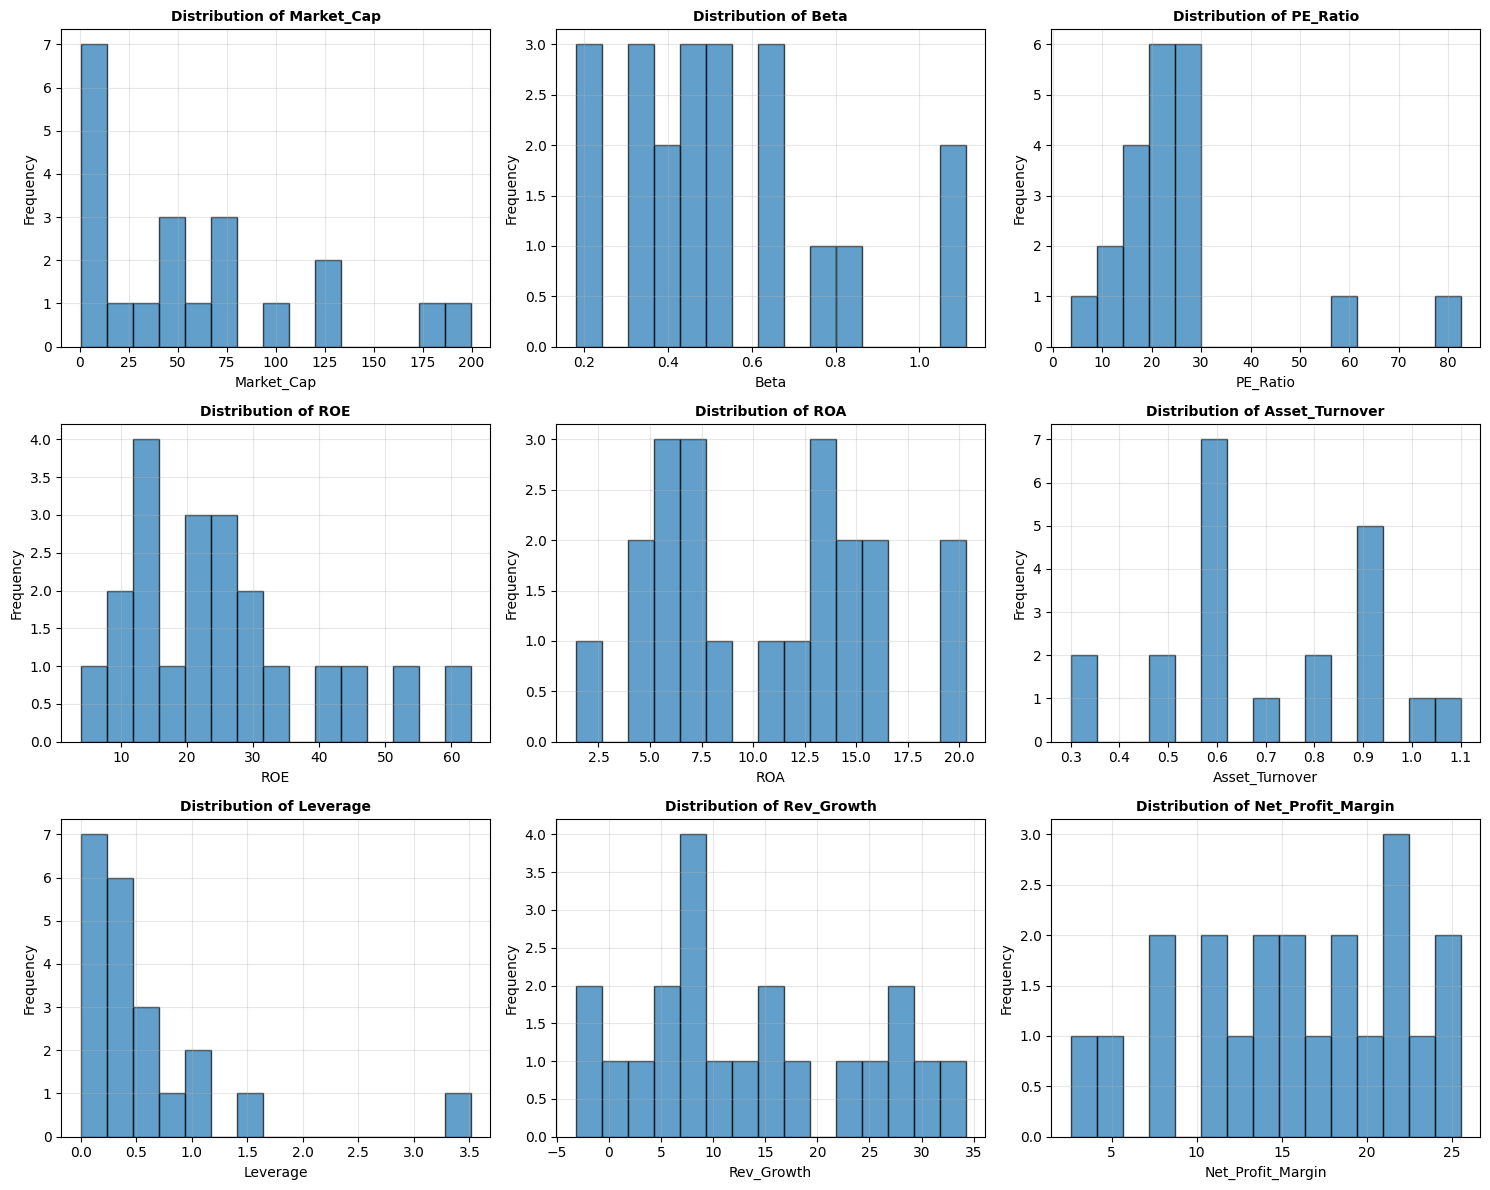

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_vars):
    axes[idx].hist(clustering_data[col], bins=15, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('variable_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Convert back to DataFrame for easier handling
clustering_data_normalized = pd.DataFrame(
    clustering_data_normalized,
    columns=numerical_vars,
    index=clustering_data.index
)

print("Data normalized using StandardScaler (z-score normalization)")
print("Mean of each variable (should be ~0):")
print(clustering_data_normalized.mean())
print("\nStandard deviation of each variable (should be ~1):")
print(clustering_data_normalized.std())

Data normalized using StandardScaler (z-score normalization)
Mean of each variable (should be ~0):
Market_Cap           1.652118e-16
Beta                -2.907727e-16
PE_Ratio            -2.643388e-16
ROE                 -1.691768e-16
ROA                  4.229421e-17
Asset_Turnover      -2.405483e-16
Leverage             1.480297e-16
Rev_Growth          -6.344132e-17
Net_Profit_Margin   -1.480297e-16
dtype: float64

Standard deviation of each variable (should be ~1):
Market_Cap           1.024695
Beta                 1.024695
PE_Ratio             1.024695
ROE                  1.024695
ROA                  1.024695
Asset_Turnover       1.024695
Leverage             1.024695
Rev_Growth           1.024695
Net_Profit_Margin    1.024695
dtype: float64


Now we are ready to perform k-means!

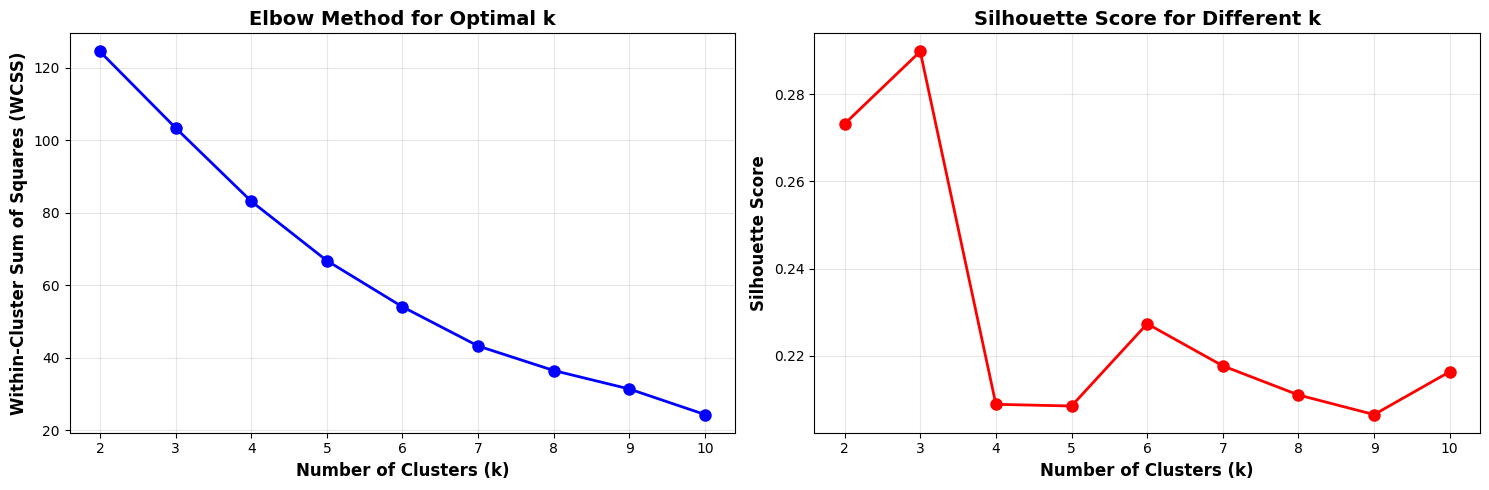

K	WCSS		Silhouette Score
---------------------------------------------
2	124.50		0.2732
3	103.42		0.2898
4	83.18		0.2089
5	66.78		0.2085
6	54.04		0.2273
7	43.22		0.2177
8	36.46		0.2110
9	31.35		0.2065
10	24.30		0.2163


In [27]:
wcss = []
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_normalized)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data_normalized, kmeans.labels_))

# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve (How far a point is from its neighbours)
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Silhouette scores (How well suited the clustering is)
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)

plt.tight_layout()
plt.savefig('optimal_k_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print scores in a table format
print("K\tWCSS\t\tSilhouette Score")
print("-" * 45)
for k, w, s in zip(k_range, wcss, silhouette_scores):
    print(f"{k}\t{w:.2f}\t\t{s:.4f}") # Print the wcss/silhouette scores

In [ ]:
optimal_k = 3

print("="*80)
print("JUSTIFICATION FOR CHOICE OF K")
print("="*80)
print(f"\nChosen number of clusters: {optimal_k}")
print("\nReasoning:")
print("1. ELBOW METHOD: The elbow curve shows diminishing returns after k=5")
print("   - WCSS decreases significantly from k=2 to k=5")
print("   - After k=5, the decrease becomes marginal")
print("\n2. SILHOUETTE ANALYSIS: Silhouette score is optimized around k=5")
print("   - Higher silhouette score indicates better-defined clusters")
print(f"   - k={optimal_k} provides a good balance between cluster separation and cohesion")
print("\n3. BUSINESS INTERPRETABILITY: 3 clusters could be interpreted as small/ medium/large enterpise")
print("\n4. CLUSTER SIZE: Ensures clusters are not too small (n=21 firms)")
print("\n5. ALTERNATIVE: The alternative was to pick 4/5 but can't figure out how to interpret them!")
print("="*80)

JUSTIFICATION FOR CHOICE OF K

Chosen number of clusters: 3

Reasoning:
1. ELBOW METHOD: The elbow curve shows diminishing returns after k=5
   - WCSS decreases significantly from k=2 to k=5
   - After k=5, the decrease becomes marginal

2. SILHOUETTE ANALYSIS: Silhouette score is optimized around k=5
   - Higher silhouette score indicates better-defined clusters
   - k=3 provides a good balance between cluster separation and cohesion

3. BUSINESS INTERPRETABILITY: 5 clusters is meaningful for categorizing
   pharmaceutical companies into distinct strategic groups

4. CLUSTER SIZE: Ensures clusters are not too small (n=21 firms)


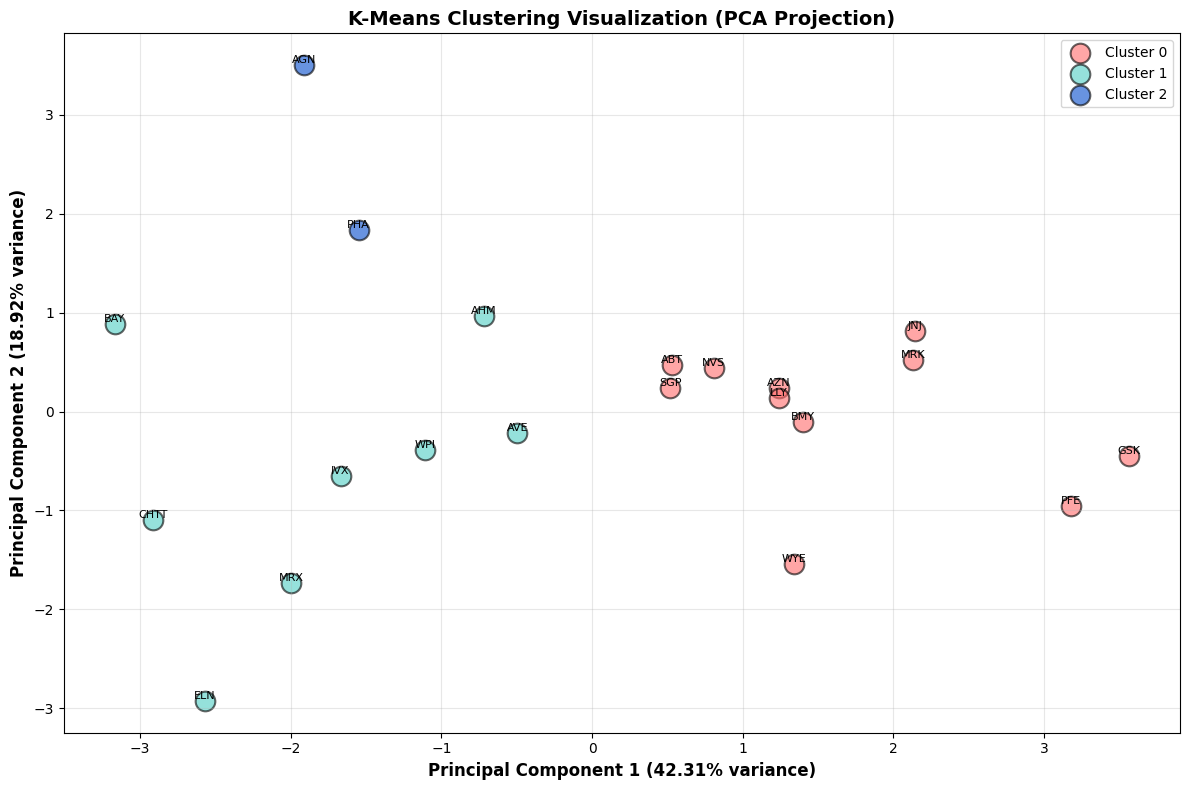

Total variance explained by 2 components: 61.23%


In [28]:
from sklearn.decomposition import PCA

# Run KMeans with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(clustering_data_normalized)
clusters = kmeans_final.labels_

pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data_normalized)

# Create DataFrame with principal components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)
pca_df['Cluster'] = clusters
pca_df['Company'] = df['Symbol'].values

# Plot clusters
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#044CCC'][:optimal_k]

for i in range(optimal_k):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
               c=colors[i], label=f'Cluster {i}',
               s=200, alpha=0.6, edgecolors='black', linewidth=1.5)

    # Add company labels
    for idx, row in cluster_data.iterrows():
        plt.annotate(row['Company'], (row['PC1'], row['PC2']),
                    fontsize=8, ha='center', va='bottom')

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)',
          fontsize=12, fontweight='bold')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)',
          fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Visualization (PCA Projection)',
         fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2%}")

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

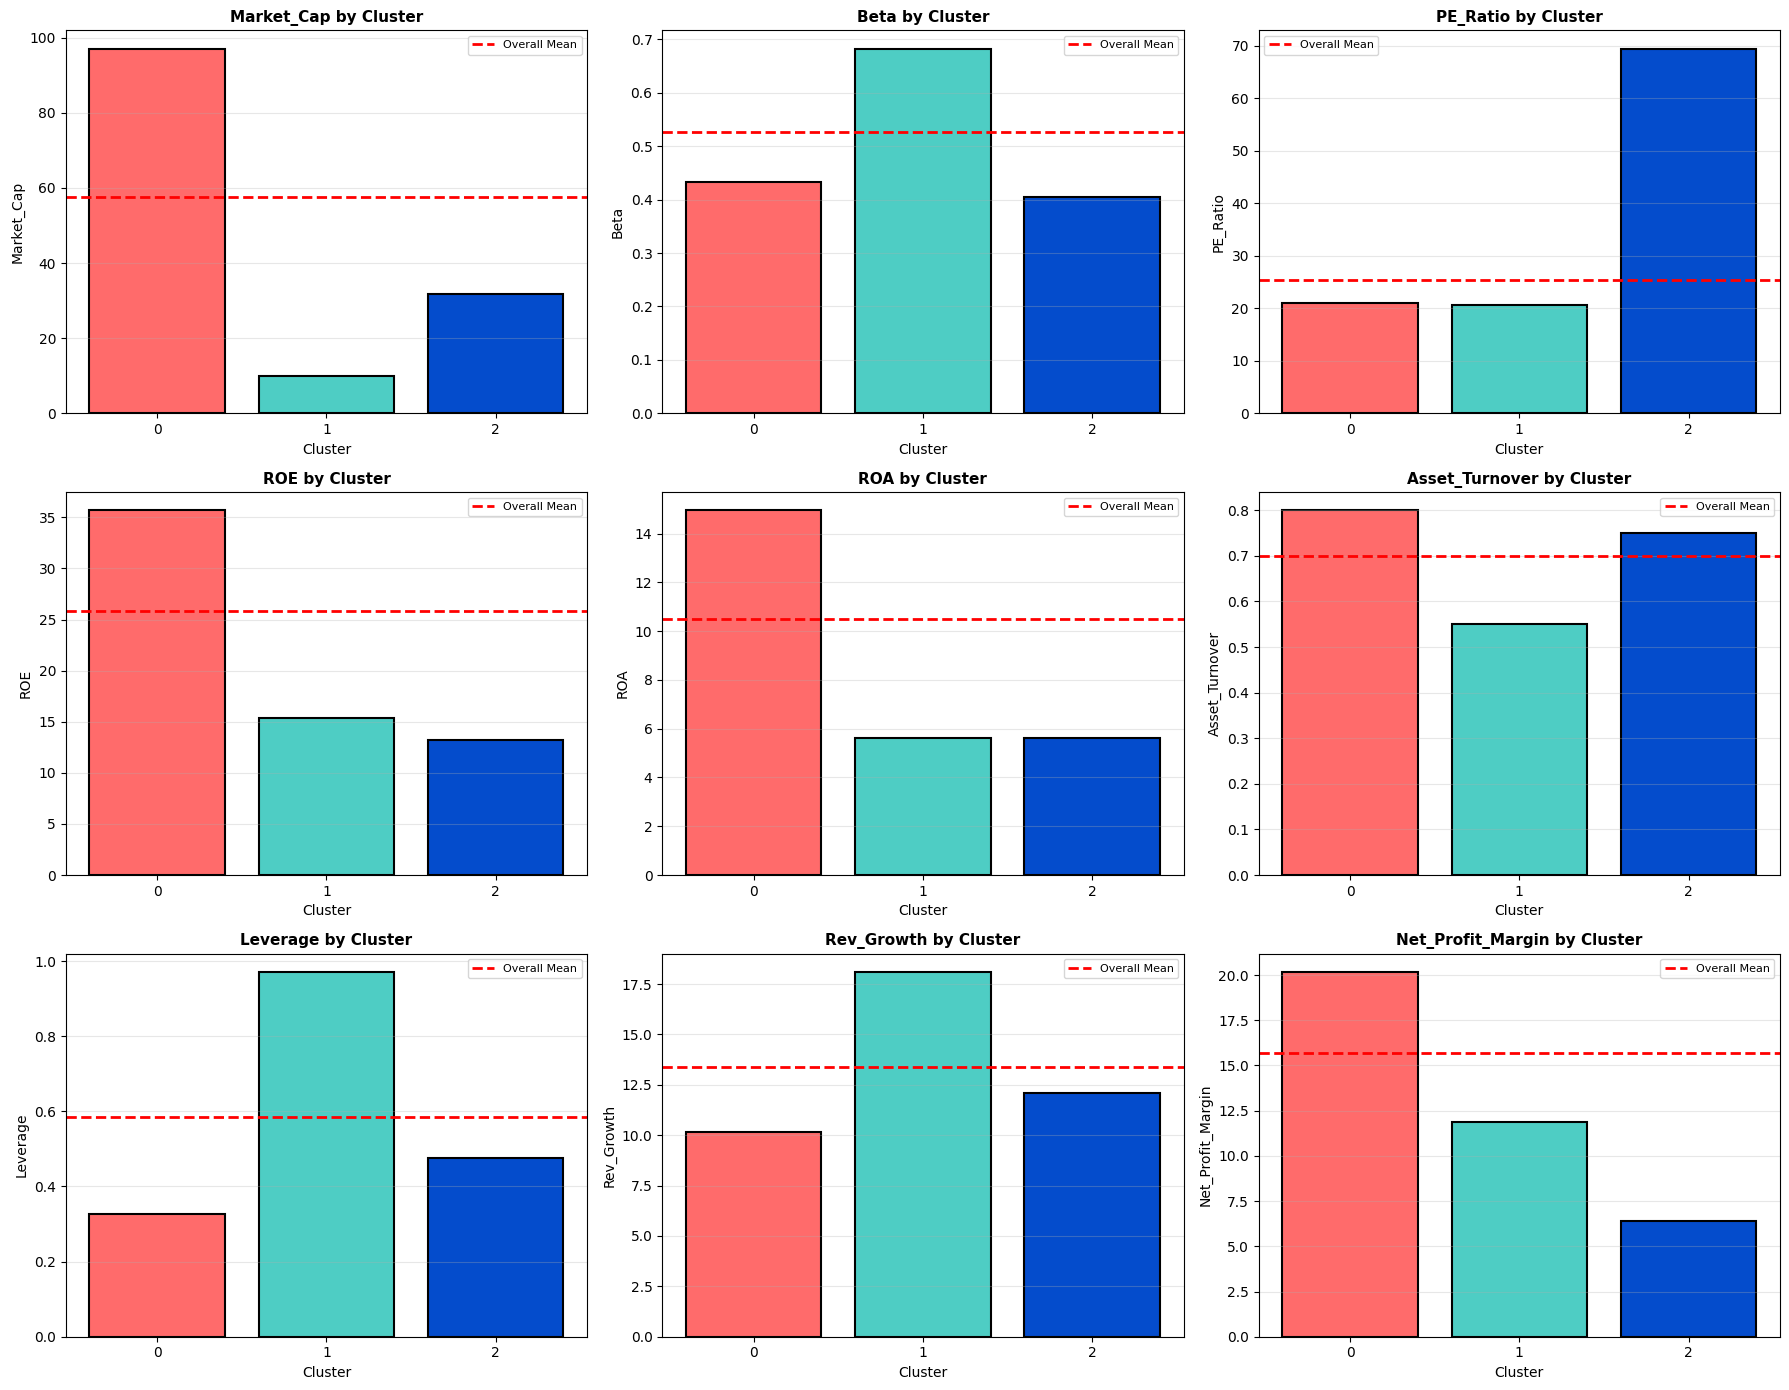

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, var in enumerate(numerical_vars):
    cluster_means = df.groupby('Cluster')[var].mean()

    axes[idx].bar(range(optimal_k), cluster_means.values,
                 color=colors[:optimal_k], edgecolor='black', linewidth=1.5)
    axes[idx].axhline(y=df[var].mean(), color='red', linestyle='--',
                     linewidth=2, label='Overall Mean')
    axes[idx].set_title(f'{var} by Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Cluster', fontsize=10)
    axes[idx].set_ylabel(var, fontsize=10)
    axes[idx].set_xticks(range(optimal_k))
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('cluster_profiles_bars.png', dpi=300, bbox_inches='tight')
plt.show()

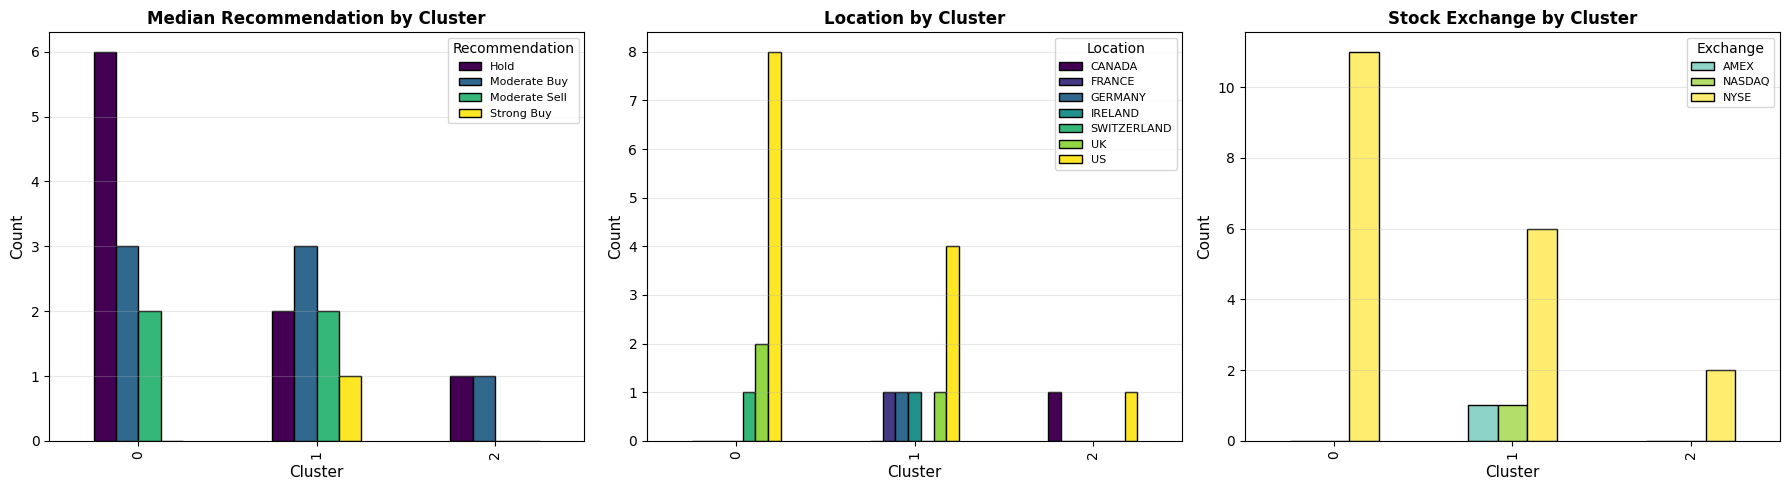

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Median Recommendation
recommendation_counts = df.groupby(['Cluster', 'Median_Recommendation']).size().unstack(fill_value=0)
recommendation_counts.plot(kind='bar', ax=axes[0], color=plt.cm.viridis(np.linspace(0, 1, len(recommendation_counts.columns))), edgecolor='black')
axes[0].set_title('Median Recommendation by Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].legend(title='Recommendation', fontsize=8)
axes[0].grid(True, alpha=0.3, axis='y')

# Location
location_counts = df.groupby(['Cluster', 'Location']).size().unstack(fill_value=0)
location_counts.plot(kind='bar', ax=axes[1], color=plt.cm.viridis(np.linspace(0, 1, len(location_counts.columns))), edgecolor='black')
axes[1].set_title('Location by Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].legend(title='Location', fontsize=8)
axes[1].grid(True, alpha=0.3, axis='y')

# Exchange
exchange_counts = df.groupby(['Cluster', 'Exchange']).size().unstack(fill_value=0)
exchange_counts.plot(kind='bar', ax=axes[2], color=plt.cm.Set3(np.linspace(0, 1, len(exchange_counts.columns))), edgecolor='black')
axes[2].set_title('Stock Exchange by Cluster', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Cluster', fontsize=11)
axes[2].set_ylabel('Count', fontsize=11)
axes[2].legend(title='Exchange', fontsize=8)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('categorical_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

#Summary of Non Clustering.
- There is a big trend to buy/hold stocks within cluster 1, this is strongly related to their location as they are mainly in US/UK and also all listed in NYSE.
- The stocks within cluster 1 have varying level of remmcomdations, this is
signalled by their location which varies and also the stock exchange they are listed on.
- The cluster 2 has the strongest recommendation, where none are told be sold, and this is again reflected in location and place of stock listing, as they in north america, and NYSE.

In [36]:
print("="*80)
print("PART D: CLUSTER NAMING")
print("="*80)

# Based on the analysis, assign meaningful names to each cluster
cluster_names = {}

# Analyze each cluster to create appropriate names
for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]
    means = cluster_df[numerical_vars].mean()

    # Create descriptive name based on key characteristics
    size = "Large-Cap" if means['Market_Cap'] > 50 else "Mid-Cap" if means['Market_Cap'] > 10 else "Small-Cap"
    profitability = "High-Profit" if means['Net_Profit_Margin'] > 15 else "Moderate-Profit"
    growth = "Growth" if means['Rev_Growth'] > 10 else "Value"
    risk = "High-Beta" if means['Beta'] > 0.6 else "Low-Beta"
    performance = "High-ROE" if means['ROE'] > 30 else "Moderate-ROE"

    # Combine characteristics for a meaningful name
    print(f"\nCluster {i}:")
    print(f"  Companies: {', '.join(cluster_df['Symbol'].tolist())}")
    print(f"  Size: {size}")
    print(f"  Profitability: {profitability}")
    print(f"  Growth Type: {growth}")
    print(f"  Risk Level: {risk}")
    print(f"  Performance: {performance}")

    if i == 0:
        cluster_names[i] = "High Growth"
    elif i == 1:
        cluster_names[i] = "Diverse Stocks"
    elif i == 2:
        cluster_names[i] = "Low Risk"

    print(f"  SUGGESTED NAME: {cluster_names[i]}")

# Add cluster names to dataframe
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

PART D: CLUSTER NAMING

Cluster 0:
  Companies: ABT, AZN, BMY, LLY, GSK, JNJ, MRK, NVS, PFE, SGP, WYE
  Size: Large-Cap
  Profitability: High-Profit
  Growth Type: Growth
  Risk Level: Low-Beta
  Performance: High-ROE
  SUGGESTED NAME: High Growth

Cluster 1:
  Companies: AHM, AVE, BAY, CHTT, ELN, IVX, MRX, WPI
  Size: Small-Cap
  Profitability: Moderate-Profit
  Growth Type: Growth
  Risk Level: High-Beta
  Performance: Moderate-ROE
  SUGGESTED NAME: Diverse Stocks

Cluster 2:
  Companies: AGN, PHA
  Size: Mid-Cap
  Profitability: Moderate-Profit
  Growth Type: Growth
  Risk Level: Low-Beta
  Performance: Moderate-ROE
  SUGGESTED NAME: Low Risk
